数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             1308 non-null   datetime64[ns]
 1   area             1308 non-null   object        
 2   weather          1308 non-null   object        
 3   max_temperature  1308 non-null   int64         
 4   min_temperature  1308 non-null   int64         
 5   aqi              1308 non-null   int64         
 6   aqiLevel         1308 non-null   int64         
 7   wind_direction   1308 non-null   object        
 8   wind_power       1308 non-null   object        
 9   aqiInfo          1308 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 102.3+ KB
None

数据统计描述:
                      time  max_temperature  min_temperature          aqi  \
count                 1308      1308.000000      1308.000000  1308.000000   
mean   202

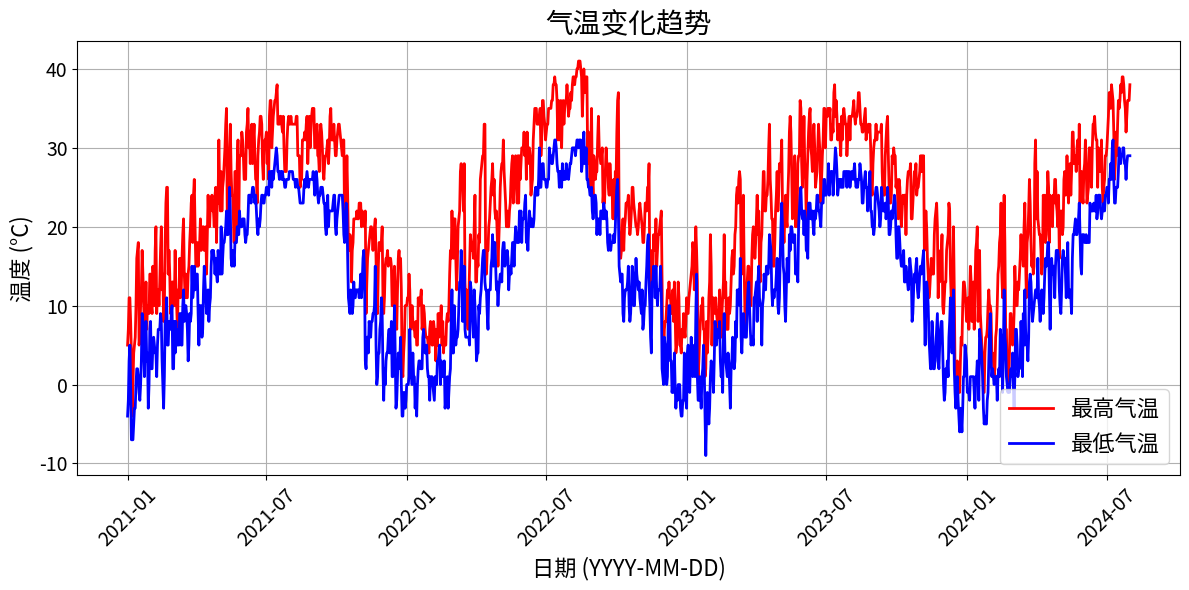

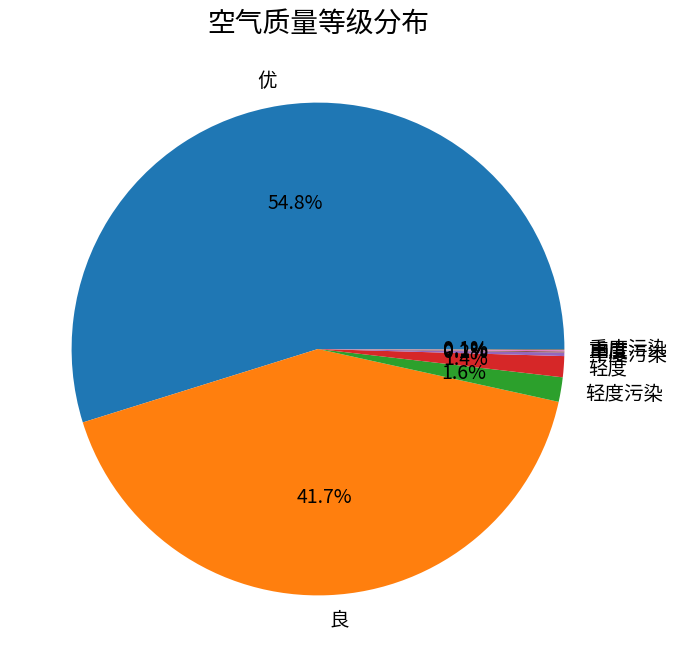

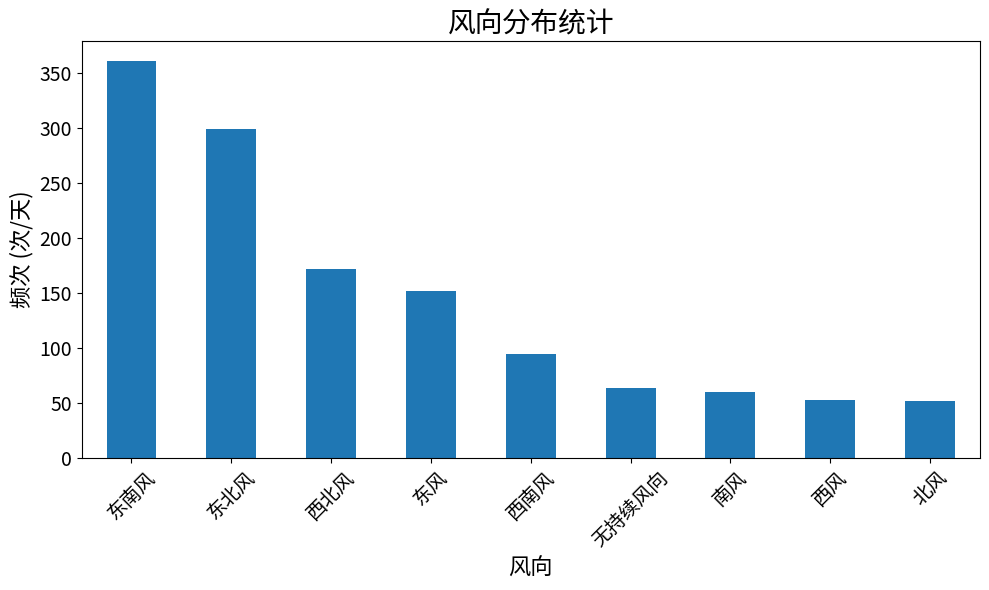

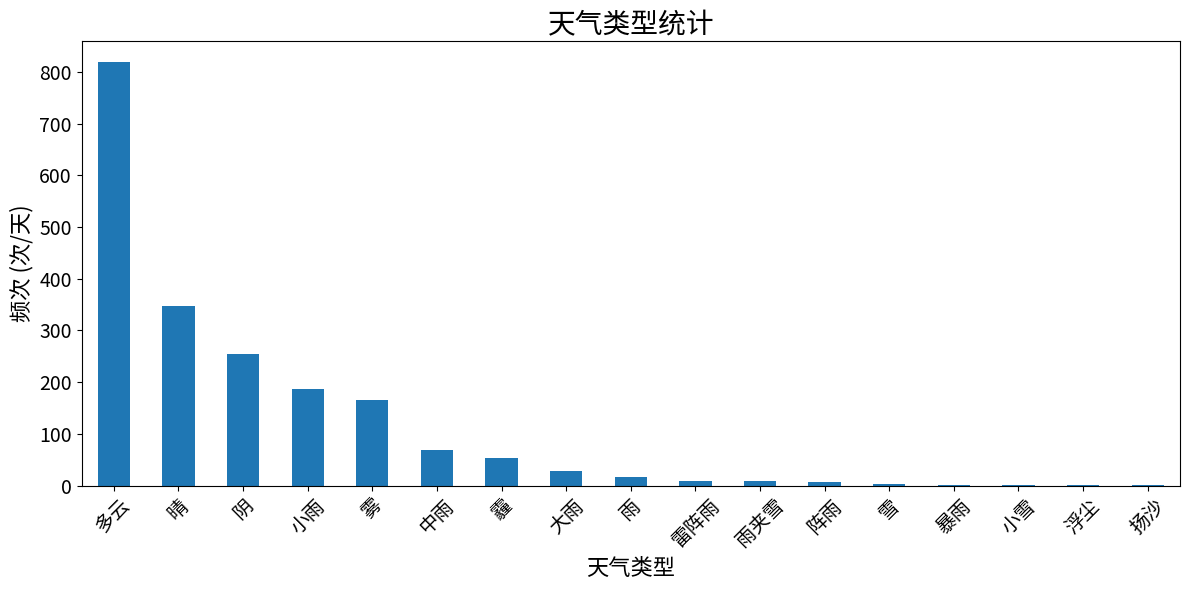

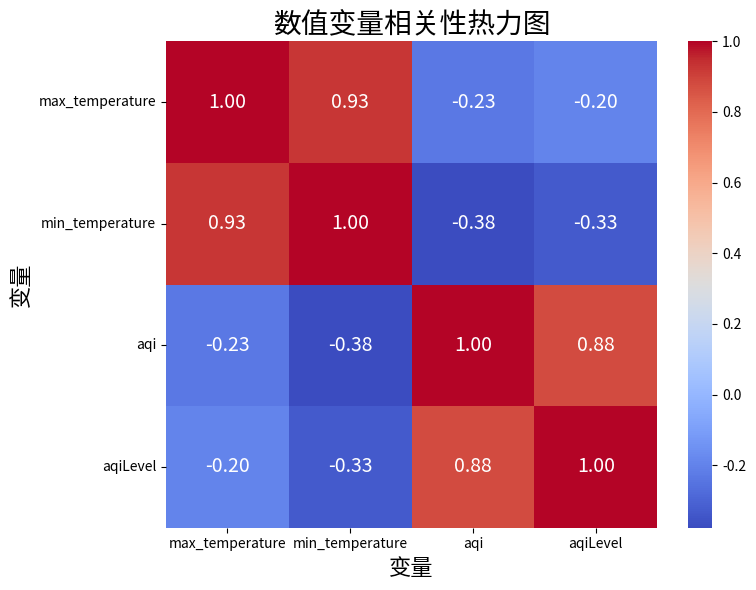


统计摘要:
   平均最高温度 (°C)  平均最低温度 (°C)  平均AQI (μg/m³) 最常见风向 最常见天气
0    21.785168    13.591743      52.305046   东南风    多云


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# 设置字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']  # 中文字体
plt.rcParams['font.serif'] = ['DejaVu Serif']  # 英文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取数据
df = pd.read_csv('00-weather_data_拖山.csv')
# 转换日期格式
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d')

# 基本信息分析
print("数据基本信息:")
print(df.info())
print("\n数据统计描述:")
print(df.describe())
print("\n数据缺失值统计:")
print(df.isnull().sum())

# 设置中英文字体
chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 1. 气温变化趋势图
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['max_temperature'], 'r-', label='最高气温', linewidth=2)
plt.plot(df['time'], df['min_temperature'], 'b-', label='最低气温', linewidth=2)
plt.title('气温变化趋势', fontproperties=chinese_font, fontsize=20)
plt.xlabel('日期 (YYYY-MM-DD)', fontproperties=chinese_font, fontsize=16)
plt.ylabel('温度 (°C)', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop=chinese_font, fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. AQI分布饼图
plt.figure(figsize=(8,8))
aqi_counts = df['aqiInfo'].value_counts()
plt.pie(aqi_counts, labels=aqi_counts.index, autopct='%1.1f%%', textprops={'fontproperties': chinese_font, 'fontsize': 14})
plt.title('空气质量等级分布', fontproperties=chinese_font, fontsize=20)
plt.show()

# 3. 风向分布统计
plt.figure(figsize=(10,6))
wind_counts = df['wind_direction'].value_counts()
wind_counts.plot(kind='bar')
plt.title('风向分布统计', fontproperties=chinese_font, fontsize=20)
plt.xlabel('风向', fontproperties=chinese_font, fontsize=16)
plt.ylabel('频次 (次/天)', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, fontproperties=chinese_font, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# 4. 天气类型统计
weather_types = df['weather'].str.split('-', expand=True).stack().value_counts()
plt.figure(figsize=(12,6))
weather_types.plot(kind='bar')
plt.title('天气类型统计', fontproperties=chinese_font, fontsize=20)
plt.xlabel('天气类型', fontproperties=chinese_font, fontsize=16)
plt.ylabel('频次 (次/天)', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, fontproperties=chinese_font, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# 5. 相关性分析
numeric_cols = ['max_temperature', 'min_temperature', 'aqi', 'aqiLevel']
correlation = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 14})
plt.title('数值变量相关性热力图', fontproperties=chinese_font, fontsize=20)
plt.xlabel('变量', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 6. 统计表格
summary_stats = pd.DataFrame({
    '平均最高温度 (°C)': [df['max_temperature'].mean()],
    '平均最低温度 (°C)': [df['min_temperature'].mean()],
    '平均AQI (μg/m³)': [df['aqi'].mean()],
    '最常见风向': [df['wind_direction'].mode()[0]],
    '最常见天气': [weather_types.index[0]]
})
print("\n统计摘要:")
print(summary_stats)


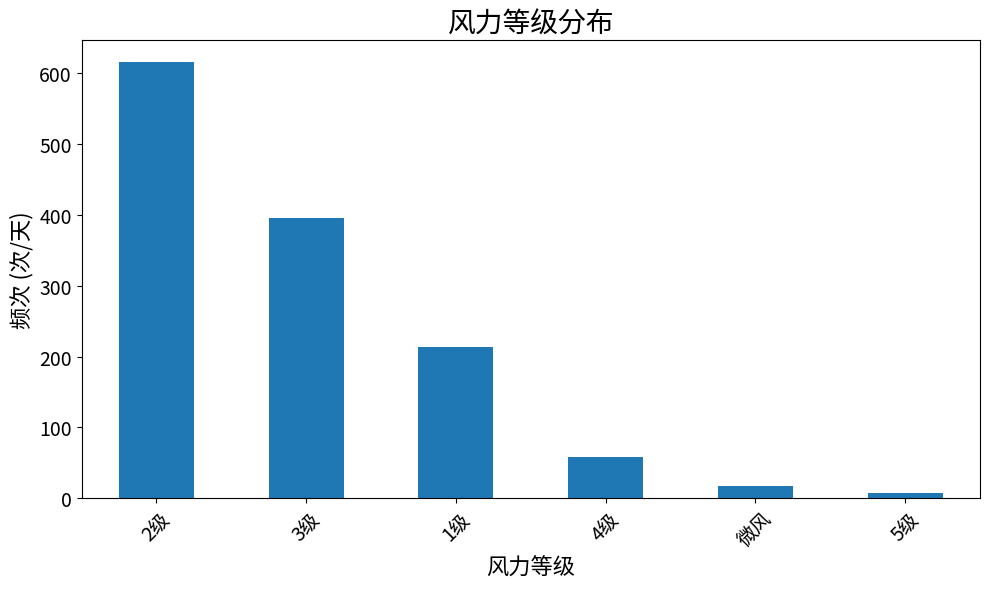

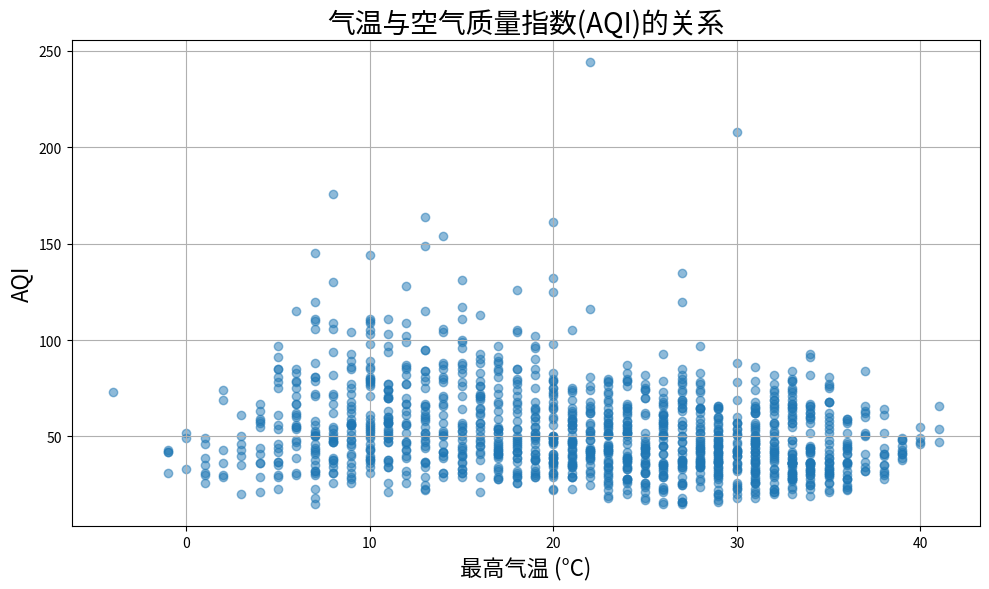

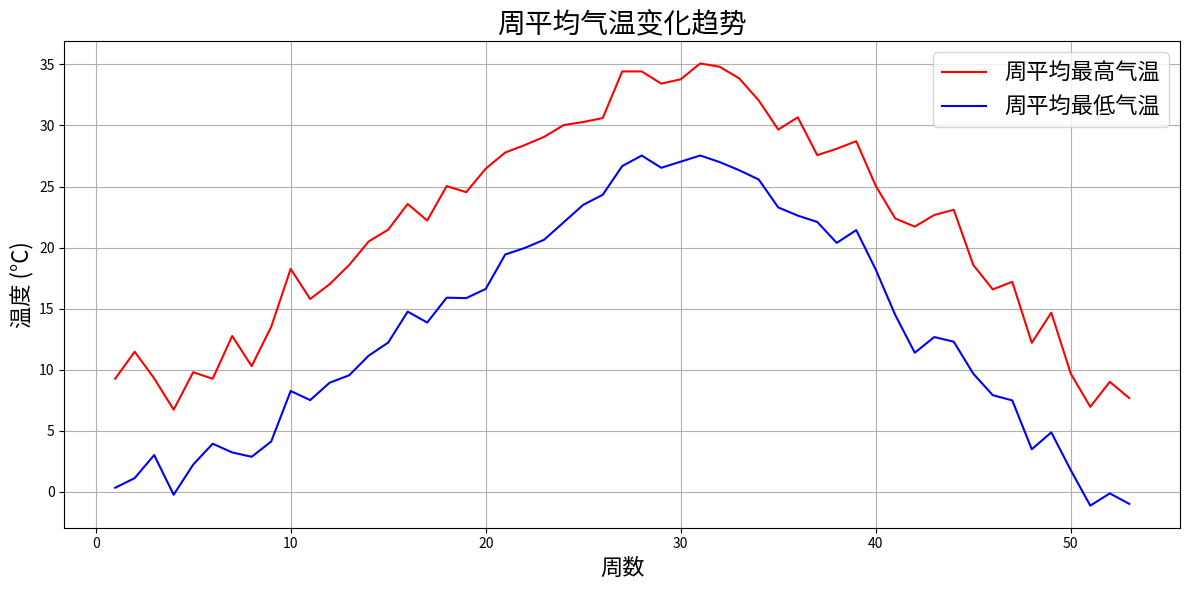

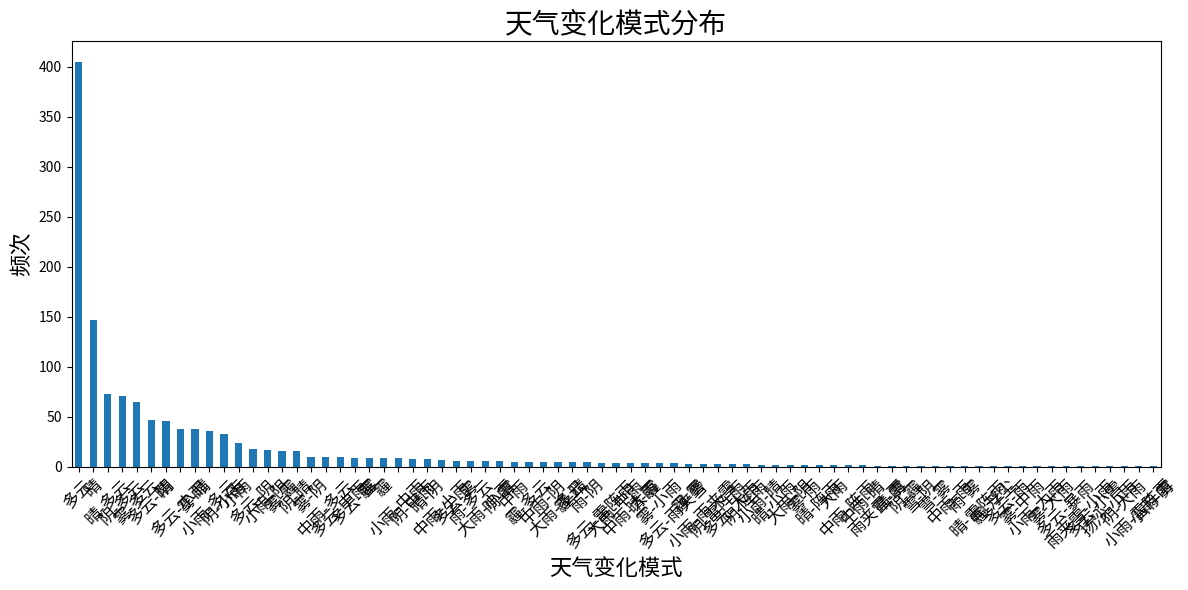

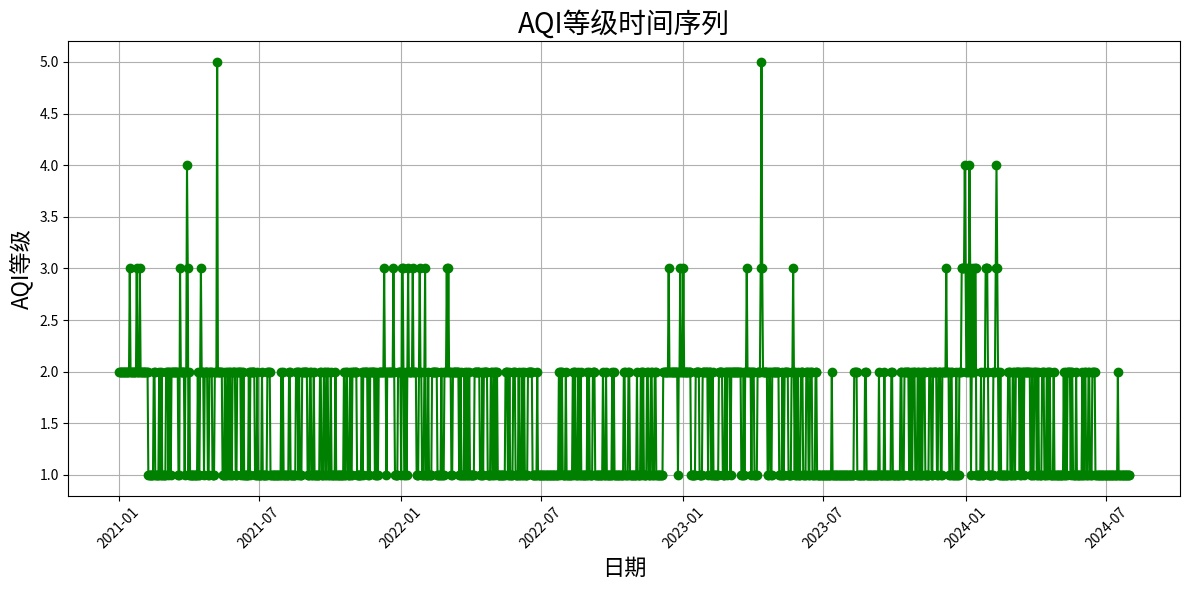

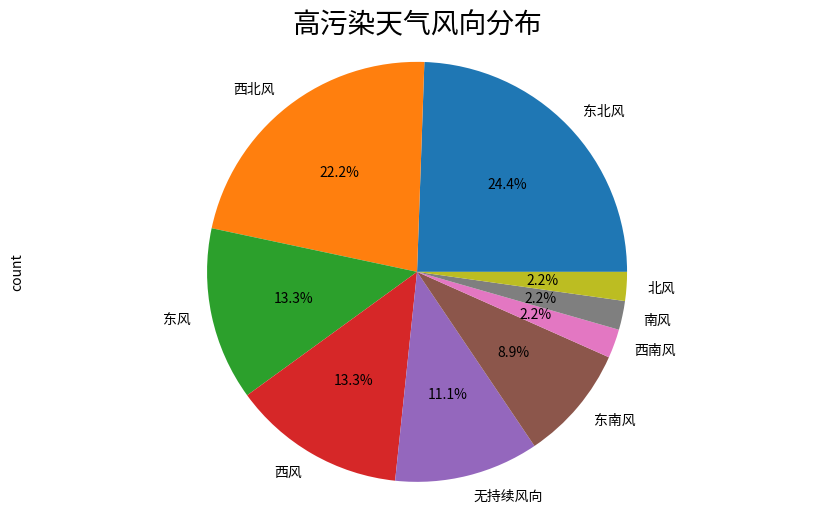

In [2]:
# 7. 风力等级分布
plt.figure(figsize=(10,6))
wind_power_counts = df['wind_power'].value_counts()
wind_power_counts.plot(kind='bar')
plt.title('风力等级分布', fontproperties=chinese_font, fontsize=20)
plt.xlabel('风力等级', fontproperties=chinese_font, fontsize=16)
plt.ylabel('频次 (次/天)', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, fontproperties=chinese_font, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# 8. 气温和AQI的散点图
plt.figure(figsize=(10,6))
plt.scatter(df['max_temperature'], df['aqi'], alpha=0.5)
plt.title('气温与空气质量指数(AQI)的关系', fontproperties=chinese_font, fontsize=20)
plt.xlabel('最高气温 (°C)', fontproperties=chinese_font, fontsize=16)
plt.ylabel('AQI', fontproperties=chinese_font, fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. 按周统计平均气温变化
df['week'] = df['time'].dt.isocalendar().week
weekly_temp = df.groupby('week')[['max_temperature','min_temperature']].mean()

plt.figure(figsize=(12,6))
plt.plot(weekly_temp.index, weekly_temp['max_temperature'], 'r-', label='周平均最高气温')
plt.plot(weekly_temp.index, weekly_temp['min_temperature'], 'b-', label='周平均最低气温')
plt.title('周平均气温变化趋势', fontproperties=chinese_font, fontsize=20)
plt.xlabel('周数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('温度 (°C)', fontproperties=chinese_font, fontsize=16)
plt.legend(prop=chinese_font)
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. 天气变化模式分析
weather_transitions = df['weather'].value_counts()
plt.figure(figsize=(12,6))
weather_transitions.plot(kind='bar')
plt.title('天气变化模式分布', fontproperties=chinese_font, fontsize=20)
plt.xlabel('天气变化模式', fontproperties=chinese_font, fontsize=16)
plt.ylabel('频次', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, fontproperties=chinese_font, fontsize=12)
plt.tight_layout()
plt.show()

# 11. AQI等级随时间的变化
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['aqiLevel'], 'g-', marker='o')
plt.title('AQI等级时间序列', fontproperties=chinese_font, fontsize=20)
plt.xlabel('日期', fontproperties=chinese_font, fontsize=16)
plt.ylabel('AQI等级', fontproperties=chinese_font, fontsize=16)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 12. 统计高污染天气的风向分布
high_pollution = df[df['aqiLevel'] >= 3]
plt.figure(figsize=(10,6))
high_pollution['wind_direction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('高污染天气风向分布', fontproperties=chinese_font, fontsize=20)
plt.axis('equal')
plt.show()


In [3]:
# 13. 气温、风级、天气类型的综合分析

# 统计不同天气类型下的平均气温
weather_temp = df.groupby('weather')[['max_temperature','min_temperature']].agg(['mean','std']).round(2)
print("\n不同天气类型的气温统计:")
print("="*80)
print(weather_temp.to_string())
print("="*80)

# 统计风力等级分布
wind_stats = df['wind_power'].value_counts()
print("\n风力等级分布统计:")
print("="*40)
for level, count in wind_stats.items():
    print(f"{level:<15} {count:>5d} 次 {count/len(df)*100:>6.1f}%")
print("="*40)

# 计算天气类型与温差的关系
df['temp_diff'] = df['max_temperature'] - df['min_temperature']
weather_temp_diff = df.groupby('weather')['temp_diff'].agg(['mean','std','min','max']).round(2)
print("\n不同天气类型的日温差统计(°C):")
print("="*80)
print(weather_temp_diff.to_string())
print("="*80)

# 统计主要天气类型的占比
weather_percent = df['weather'].value_counts()
print("\n天气类型占比统计:")
print("="*60)
for weather, count in weather_percent.items():
    print(f"{weather:<20} {count:>5d} 次 {count/len(df)*100:>6.1f}%")
print("="*60)

# 计算风力等级与气温的相关性
wind_temp_stats = df.groupby('wind_power').agg({
    'max_temperature': ['mean', 'std', 'min', 'max'],
    'min_temperature': ['mean', 'std', 'min', 'max']
}).round(2)

print("\n风力等级与气温关系统计(°C):")
print("="*100)
print(wind_temp_stats.to_string())
print("="*100)



不同天气类型的气温统计:
        max_temperature        min_temperature       
                   mean    std            mean    std
weather                                              
中雨                10.80   3.35            8.60   3.65
中雨-多云             28.40   4.48           21.70   4.92
中雨-大雨             27.50   4.93           23.75   3.86
中雨-小雨             21.71  10.69           16.00  10.07
中雨-晴              19.50   2.12           14.00   0.00
中雨-阴              23.40  11.46           19.00  10.98
中雨-阵雨             17.00   5.66           10.50  12.02
中雨-雨               7.00    NaN            5.00    NaN
多云                23.43   9.60           15.03   9.70
多云-中雨             23.10   5.74           15.40   5.64
多云-大雨             30.00   1.73           20.67   2.89
多云-小雨             22.68   8.67           15.63   7.13
多云-小雪              4.00    NaN            1.00    NaN
多云-晴              21.79  10.18           12.21  10.14
多云-暴雨             35.00    NaN           25.00    NaN
多云-阴          